In [1]:
import sys
import import_ipynb
from pathlib import Path
from scipy.sparse.linalg import spsolve
from IPython.display import SVG, display

# Adicionar o diretório raiz do projeto ao sys.path
project_root = Path().resolve().parent  
sys.path.append(str(project_root))
print("Project root added to sys.path:", project_root)

# Importando notebooks diretamente
try:
    import problem_statement as ps  
    from fem_processing import matrices_assembly as assembly
    from fem_pos_processing import graph_results
    print("Modules imports were successful!")
except ModuleNotFoundError as en:
    print(f"Modules were not found: {en}")
except ImportError as en:
    print(f"Error in import: {en}")

Project root added to sys.path: C:\Users\adilt\OneDrive\05_GIT\PPGEE-2024.2-MEF
Todas as propriedades foram verificadas com sucesso para os elementos P1!
Todas as propriedades foram verificadas com sucesso para os elementos P2!
Todas as propriedades foram verificadas com sucesso para os elementos P3!
Todas as propriedades foram verificadas com sucesso para os elementos Q1!
Todas as propriedades foram verificadas com sucesso para os elementos Q2!
Modules imports were successful!


# Project 4: Vectorial Poisson Problem at Rectangular Domain $\Omega = [-1,1]^2$

Considere um problema vetorial de _Poisson_ 2D em $\Omega = [-1,1]^2$

$$
\nabla \times \nabla \times \mathbf{u}(\mathbf{x}) + a \mathbf{u}(\mathbf{x}) =
\mathbf{f}(\mathbf{x}) \quad \text{em} \; \Omega = [-1, 1]^2
\tag{1}
$$

$$
\hat{n} \times \mathbf{u} = 0 \quad \text{em} \; \partial \Omega
$$

onde a fonte é dada por,
$$
\mathbf{f}(x,y) = (2\pi^2 + 1)\, 
\begin{pmatrix}
cos(\pi x)  sin(\pi y) \\
-sin(\pi x)  cos(\pi y) \\
\end{pmatrix}
\tag{2}
$$

A solução analítica deste problema é

$$
\mathbf{u}(x,y) = 
\begin{pmatrix}
cos(\pi x)  sin(\pi y) \\
-sin(\pi x)  cos(\pi y) \\
\end{pmatrix}
\tag{3}
$$

Implemente um programa de elementos finitos utilizando elementos de _Nedelec_ do tipo 1, $N_0$, em $R^2$ para resolver o Problema de Valor de Contorno vetorial $(1)$.

# 3-noded Linear Triangular Elements, $P_1$
## Pre-processor module
## Geometry and mesh Domain

In [2]:
FINITE_ELEMENT = ("Triangle", 1)
BOUNDARY = [{'tag': 101, 'type': 'Dirichlet', 'value': 0.0, 'name': 'entire_boundary'}]
MATERIAL = [{'tag': 201, 'name': 'free_space', 'a_constant': 1}]

# Create mesh from file geometry
h = 0.1
mesh_data = ps.create_meshed_domain(FINITE_ELEMENT, BOUNDARY, MATERIAL, h, view_mesh=False)

Malha salva em pre_processing/mesh/vectorial_poisson_domain_Triangle1.msh
Model vectorial_poisson (2D)
Info     : 9 geometric entities
Info     : 2 Physical Groups
Info     : 514 nodes in total
Info     : 946 2-D elements in total


In [3]:
mesh_data['edges'][1]

{'conn': [1, 5],
 'bc': {'tag': 101,
  'type': 'Dirichlet',
  'value': 0.0,
  'name': 'contour_domain'},
 'len': 0.09999999999972264}

# Figure 1: Meshed domain

Arquivo salvo em: c:\Users\adilt\OneDrive\05_GIT\PPGEE-2024.2-MEF\p41_vectorial_poisson_problem\pre_processing\pictures\meshed_domain_Triangle1_EntireDomain.svg


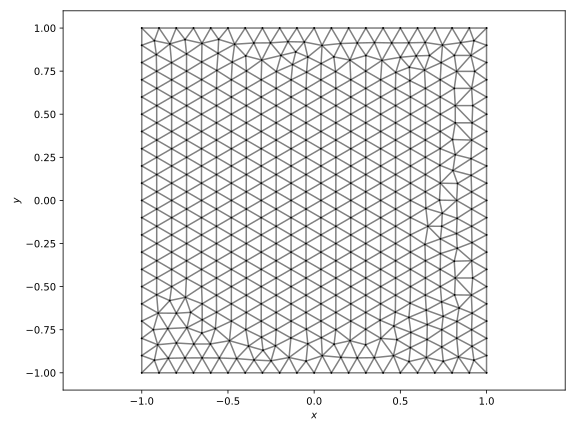

In [4]:
if h in [2, 1]:
    graph_results.plot_mesh(FINITE_ELEMENT, mesh_data, numbering=True, show_edges=True)
else:
    graph_results.plot_mesh(FINITE_ELEMENT, mesh_data)
display(SVG(filename="pre_processing/pictures/meshed_domain_Triangle1_EntireDomain.svg"))

# FEM Formulation

In [5]:
# Global matrices assembling
Sg, fg, Mg, _, _ = assembly.global_matrices(FINITE_ELEMENT, mesh_data, formulation='edge')

# Apply boundary conditions
Sg, fg = assembly.apply_simple_dirichlet_vectorial(Sg, fg, mesh_data)

# Solve the linear system
Ag = Sg + Mg

# Solução do problema matricial
curl_uh = spsolve(Ag.tocsr(), fg.toarray())

# Criar o dicionário da solução numérica
curl_uh = {key+1: value for key, value in enumerate(curl_uh)}

## Interpolate solution

In [6]:
xik_master = (1/3, 1/3)
uh_at_cell = ps.interpolate_solution(mesh_data, curl_uh, xik_master)

# Figure 2: Numerical solution at $\partial{\Omega_c}$

Arquivo salvo em: c:\Users\adilt\OneDrive\05_GIT\PPGEE-2024.2-MEF\p41_vectorial_poisson_problem\pos_processing\pictures\vectorial_fem_solution_Triangle1_EntireDomain.svg


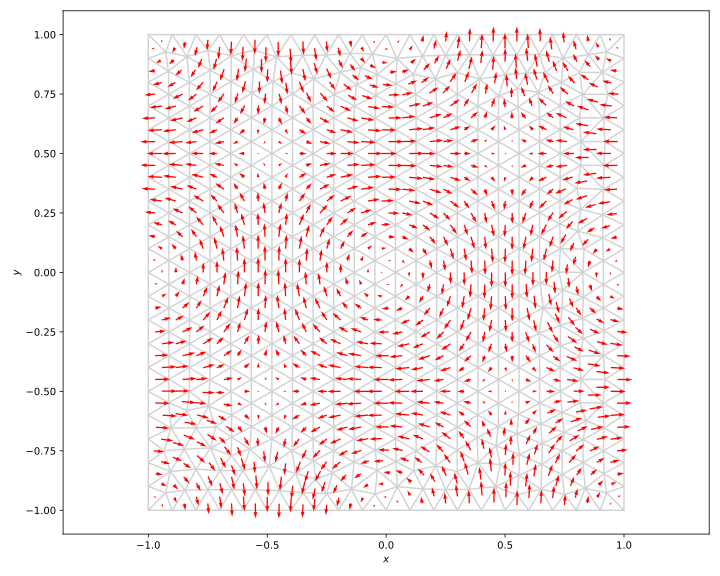

In [7]:
graph_results.vectorial_fem_solution(FINITE_ELEMENT, mesh_data, uh_at_cell)
display(SVG(filename="pos_processing/pictures/vectorial_fem_solution_Triangle1_EntireDomain.svg"))

In [8]:
uh_at_cell

{1: array([[-9.46204794+0.j],
        [-5.86849483+0.j]]),
 2: array([[-2.2788057 +0.j],
        [17.24727257+0.j]]),
 3: array([[ -3.32942972+0.j],
        [-14.49302238+0.j]]),
 4: array([[-6.68717602+0.j],
        [-4.58004076+0.j]]),
 5: array([[18.56451233+0.j],
        [ 0.097608  +0.j]]),
 6: array([[18.82785238+0.j],
        [ 0.07536865+0.j]]),
 7: array([[-18.83866005+0.j],
        [ -0.0479044 +0.j]]),
 8: array([[-18.60118357+0.j],
        [ -0.16101391+0.j]]),
 9: array([[ 7.32716964+0.j],
        [13.3713753 +0.j]]),
 10: array([[-14.39035683+0.j],
        [ -4.33701838+0.j]]),
 11: array([[-15.41760897+0.j],
        [ -5.30220531+0.j]]),
 12: array([[-18.34901008+0.j],
        [  2.23475478+0.j]]),
 13: array([[-17.02981764+0.j],
        [  2.99285434+0.j]]),
 14: array([[17.55073015+0.j],
        [-3.07864302+0.j]]),
 15: array([[18.35745175+0.j],
        [-2.21055053+0.j]]),
 16: array([[ -3.39456247+0.j],
        [-11.83236014+0.j]]),
 17: array([[ -1.70590024+0.j],
 

Conversão do arquivo Jupyter Notebook para um script Python: ``python -m nbconvert --to script name.ipynb``

Belo Horizonte, Brazil. 2025.  
Adilton Junio Ladeira Pereira - adt@ufmg.br  
&copy; All rights reserved.